## Observations and Insights 

# Observations
* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

1. According the bar charts Capomulin and Ramicane were the most effecitve at keeping the mice alive for the duration of the study.

2. After calculating the mean, median, variance, standard deviation, and SEM of the tumor volume data, Capomulin and Ramicane were the most effecitve at reducing tumor size.

3.  Acording to the Linear Regression Model graph we see a steady increase in tumor volume as the weight of the mouse increases.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset.  Combining data means to merge data.  Looking at the both data frames, find commonalities
#so you can "join" data

# Display the data table for preview


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
#create a variable to store the joined data between mouse_metadata and study_results.  They share the mouse ID column in common

studydata = pd.merge(mouse_metadata,study_results, on="Mouse ID")
studydata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
studydata["Mouse ID"].nunique()


249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. #Keep=False, you telling the data frame to treat the instance of the match
#as a duplicate

studydata[studydata.duplicated(["Mouse ID", "Timepoint"],keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
#create a variable to store study data dropping the duplicate mouse by its ID.  Will use the loc comand
#!= called an operator use to make comparison, means not equal to

cleandata = studydata.loc[studydata["Mouse ID"]!= "g989"]
cleandata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame. we see that i dropped by one
cleandata["Mouse ID"].nunique()

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# create a variable to group the data by drug regimen.  This variable will be used to perform each calculation from above.

druggroup = cleandata.groupby("Drug Regimen")

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#Create a variable to store the mean tumor volume

tumormean = druggroup["Tumor Volume (mm3)"].mean()

#create a variable to store the median of the tumor volume

tumormedian = druggroup["Tumor Volume (mm3)"].median()

# Create a variable to store the variance of tumor volume
tumorvar = druggroup["Tumor Volume (mm3)"].var()

#create a variable to store the standard deviation for tumor volumn

tumorstd = druggroup["Tumor Volume (mm3)"].std()

#create a variable to store the SEM of the tumor volume

tumorsem = druggroup["Tumor Volume (mm3)"].sem()

tumorvoldata = pd.DataFrame({
    "Average Volume": tumormean,
    "Tumor Median": tumormedian,
    "Tumor Variance": tumorvar,
    "Tumor Standard Deviation": tumorstd,
    "Tumor SEM": tumorsem
})
tumorvoldata


,Average Volume,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
# use .agg command to produce a data frame
# for this example we must call the column we want to aggregate

cleandata.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean","median", "var", "std", "sem" ]
})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [62]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# group mice by what treatment drug they were ond the time point
#Structure data a certain way so they can interpreted correctly by graph commands

#create a variable to store the mice by what treatment drug they were ond the time point

treatmentgroup = cleandata.groupby(["Drug Regimen", "Timepoint"])

#create a variable to store the count per drug and time

mousecount = treatmentgroup["Mouse ID"].count()

# create a data frame to store the mice counts which are grouped by drug regimin and timepoint
#the way this data is structured will not give a bar graph because timepoints are not in a column form.
mousecountsummary = pd.DataFrame(mousecount)
mousecountsummary.columns = ["Timepoint"]





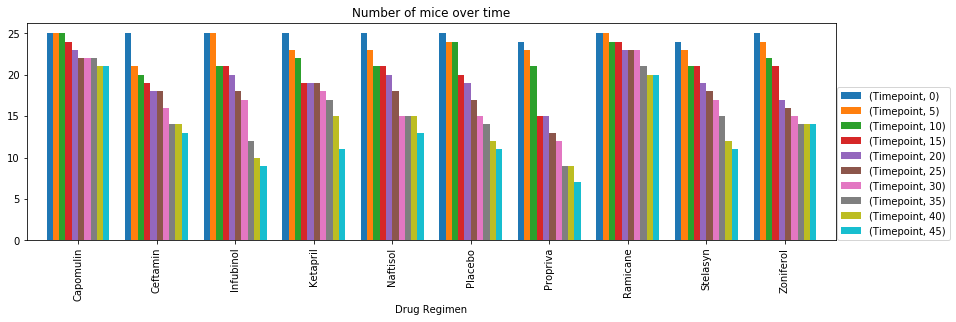

In [121]:
#Using the unstack command to structure data
#.unstack will present the data so timepoints is displayed horizontally and each 

#mousecountsummary = mousecountsummary.unstack()

#create a variable to store graph object 
#figsize, 1st number is width, second is height, google pands figsize

mousecountgraph = mousecountsummary.unstack(1).plot(kind = "bar",
                                        figsize = (14.5, 4),
                                        width = .8,
                                        title = "Number of mice over time"
                                        
 
                                    )

#adjust legend location so it is not on the graph.
mousecountgraph.legend(loc = (1.001, 0))


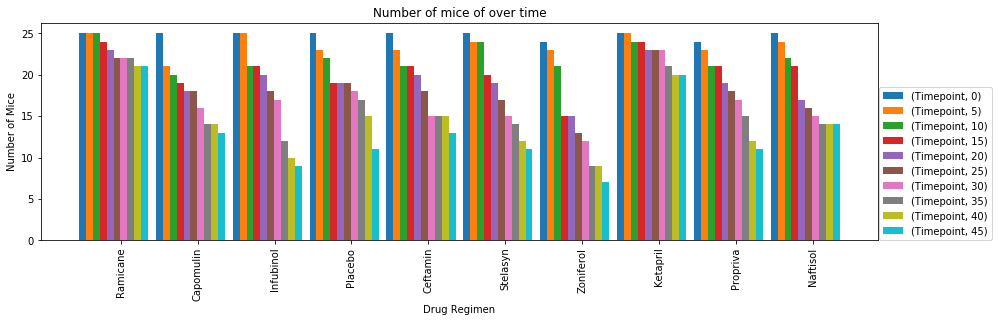

In [90]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#create a variable so we dont have to keep from typing mousecountsummary.unstack(1)
mouse2 = mousecountsummary.unstack(1)

import numpy as np

# equal to 10 because we have 10 different drugs

numberofcolumns = 10
figure = plt.figure(figsize = (15, 4))

#create a variable for storing our subplot data for storing each column
formatting = figure.add_subplot()

#create an array based on the number of columns possible
#an array is comma separated list

columnarray = np.arange(numberofcolumns)
width = 0.09
#create graph

plt.bar(columnarray, mouse2["Timepoint", 0], width, label = "(Timepoint, 0)")
plt.bar(columnarray+width*1, mouse2["Timepoint", 5], width, label = "(Timepoint, 5)")
plt.bar(columnarray+width*2, mouse2["Timepoint", 10], width, label = "(Timepoint, 10)")
plt.bar(columnarray+width*3, mouse2["Timepoint", 15], width, label = "(Timepoint, 15)")
plt.bar(columnarray+width*4, mouse2["Timepoint", 20], width, label = "(Timepoint, 20)")
plt.bar(columnarray+width*5, mouse2["Timepoint", 25], width, label = "(Timepoint, 25)")
plt.bar(columnarray+width*6, mouse2["Timepoint", 30], width, label = "(Timepoint, 30)")
plt.bar(columnarray+width*7, mouse2["Timepoint", 35], width, label = "(Timepoint, 35)")
plt.bar(columnarray+width*8, mouse2["Timepoint", 40], width, label = "(Timepoint, 40)")
plt.bar(columnarray+width*9, mouse2["Timepoint", 45], width, label = "(Timepoint, 45)")

formatting.set_xticks(columnarray+.5)

# steps to greate the legend
formatting.legend(loc=(1.001, 0))

#create a list that has the drug sames
drugname = cleandata["Drug Regimen"].unique()

formatting.set_xticklabels(drugname, rotation = 90)

#label titles
plt.title("Number of mice of over time")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

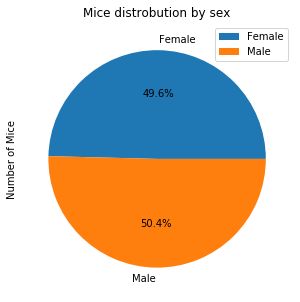

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#create a variable to group our data sex
gendergroup = cleandata.groupby("Sex")

# create a variable to store the unique count of mouse IDs by sex
gendercount = gendergroup["Mouse ID"].nunique()
#create data frame to store gender count data

gendercountdf= pd.DataFrame({
"Number of Mice": gendercount
    
})
gendercountdf


gendercountdf.plot(kind = "pie",
                  y = "Number of Mice",
                   figsize = (10, 5),
                   autopct = "%1.1f%%",
                   title = "Mice distrobution by sex"

)

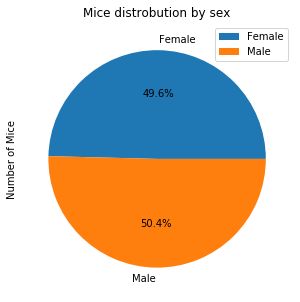

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize = (10,5))
plt.pie(
        gendercountdf["Number of Mice"],
        autopct = "%1.1f%%",
        labels = ["Female", "Male"]
    
)
plt.legend()
plt.ylabel("Number of Mice")
plt.title("Mice distrobution by sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#filter the data by specific drugs

druglist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


specificdrugdata = cleandata.loc[cleandata["Drug Regimen"].isin(druglist)]
specificdrugdata




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [120]:
#Quartiles, Outliers and Boxplots
# Start by getting the last (greatest) timepoint for each mouse.  Find the largest timepoint on each mouse.
# groupby mouse id

specficdruggroup = specificdrugdata.groupby(["Mouse ID", "Drug Regimen"])

specficdruggroup["Tumor Volume (mm3)"].last()


lastrecordedtumordata = pd.DataFrame(specficdruggroup["Tumor Volume (mm3)"].last())
lastrecordedtumordata
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a275,Ceftamin,62.999356
a411,Ramicane,38.407618
a444,Ramicane,43.047543
...,...,...
y769,Ceftamin,68.594745
y793,Capomulin,31.896238
y865,Ceftamin,64.729837


In [117]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes   
# add subset 


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#use lastrecordedtumordata

quartiles = lastrecordedtumordata["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
 

    
# Determine outliers using upper and lower bounds
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [135]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Going to pivot the data, similar to the bar graph, for box plot.  
#Using this method instead of mergering data frames and using for loops

# using the(1) to represent the second column we grouped on specficdruggroup = specificdrugdata.groupby(["Mouse ID", "Drug Regimen"])

lastrecordedtumordata.unstack(1)

Tumor Volume (mm3)                                 
Drug Regimen          Capomulin   Ceftamin  Infubinol   Ramicane
Mouse ID                                                        
a203                        NaN        NaN  67.973419        NaN
a251                        NaN        NaN  65.525743        NaN
a275                        NaN  62.999356        NaN        NaN
a411                        NaN        NaN        NaN  38.407618
a444                        NaN        NaN        NaN  43.047543
...                         ...        ...        ...        ...
y769                        NaN  68.594745        NaN        NaN
y793                  31.896238        NaN        NaN        NaN
y865                        NaN  64.729837        NaN        NaN
z578                        NaN        NaN        NaN  30.638696
z581                        NaN        NaN  62.754451        NaN

[100 rows x 4 columns]

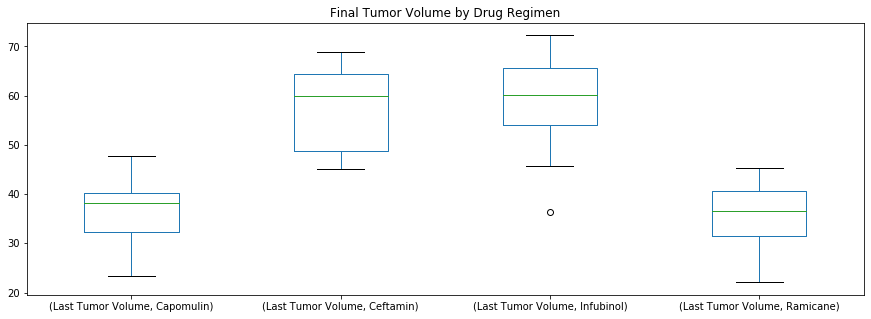

In [141]:
#Rename tumor volumne mm3 column to last tumor volume
#inplace will save this change moving for lastrecorededtumordata
lastrecordedtumordata.rename(columns = {"Tumor Volume (mm3)": "Last Tumor Volume"}, inplace = True)

#create box chart
lastrecordedtumordata.unstack(1).plot(kind = "box",
                                      figsize = (15,5),
                                      title = "Final Tumor Volume by Drug Regimen"
)
plt.show()

## Line and Scatter Plots

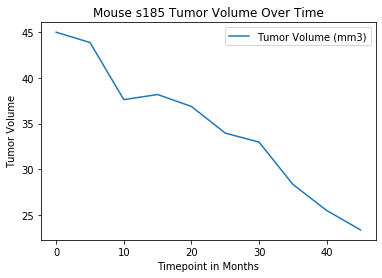

In [158]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#use loc command to search orginigal data frame for mice on Capomulin
Capomulindata = cleandata.loc[cleandata["Drug Regimen"] =="Capomulin"]

#create a data frame for s185
s185data = Capomulindata.loc[Capomulindata["Mouse ID"]=="s185"]
#s185data to see data before moving on to plotting

# give y and x axis details
#s185data.plot(x="Timepoint",
              #y= "Tumor Volume (mm3)",
              #title= "Mouse s185 Tumor Volume Over Time",
#).set_ylabel("Tumor Volume")
#plt.show()

s185graph = s185data.plot(x="Timepoint",
              y= "Tumor Volume (mm3)",
              title= "Mouse s185 Tumor Volume Over Time"
             )
s185graph.set_xlabel("Timepoint in Months")
s185graph.set_ylabel("Tumor Volume")
        
plt.show()             

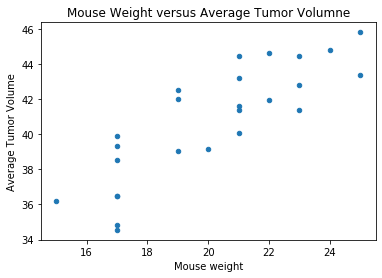

In [166]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#already have a dataframe with capomulin information.  Use .mean tumor after grouping capolmuin df by mouse ID
# easier way to calculate weight: capogroup["Weight (g)"].first()
capogroup = Capomulindata.groupby("Mouse ID")
capogroup["Tumor Volume (mm3)"].mean()

capoaveragetumor = capogroup["Tumor Volume (mm3)"].mean()
capogroupweight= capogroup["Weight (g)"].sum()/capogroup["Weight (g)"].count()

capograph = pd.DataFrame({
    "Average Tumor Volume": capoaveragetumor,
    "Mouse weight": capogroupweight
}).plot(kind = "scatter", x = "Mouse weight", y = "Average Tumor Volume", title = "Mouse Weight versus Average Tumor Volume")

## Correlation and Regression

In [169]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#imported a model called scipy which allows us to use correlations.
#correlations coefficient will determine if our sample size is strong enough to be valid.
#use day 3 example 6

capo_dataframe = pd.DataFrame({
    "Average Tumor Volume": capoaveragetumor,
    "Mouse weight": capogroupweight
})

correlation = st.pearsonr(capo_dataframe["Mouse weight"],capo_dataframe["Average Tumor Volume"])

print(f"The correlation between both factors is {round(correlation[0],2)}")



The correlation between both factors is 0.84


The r-squared is: 0.7088568047708717


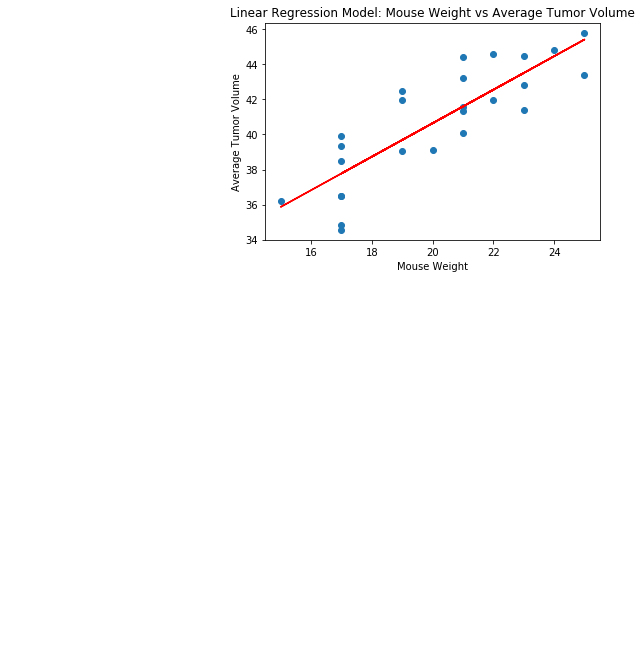

In [182]:
# graph linear regression model, used to make predications about where your data will go
# use example from day 3 example 8
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(capo_dataframe["Mouse weight"], capo_dataframe["Average Tumor Volume"])
regress_values = capo_dataframe["Mouse weight"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capo_dataframe["Mouse weight"],capo_dataframe["Average Tumor Volume"])
plt.plot(capo_dataframe["Mouse weight"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Linear Regression Model: Mouse Weight vs Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")

plt.show()

In [181]:
line_eq

'y = 0.95x + 21.55'